<a href="https://www.kaggle.com/code/ayeshairshadcoder/big-mart-sales-prediction?scriptVersionId=138807476" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [2]:
test=pd.read_csv("/kaggle/input/bigmart-sales-data/Test.csv")
train=pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
train.shape

(8523, 12)

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

We are gonna handle these missing values by using mean and mode

In [9]:
print("Item Weight : ",train["Item_Weight"].mean())
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())

Item Weight :  12.857645184135976


Now Analyzing the Outlet size to handle its null values

In [10]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
train["Outlet_Size"].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

As we can see in above cell that its in categorical form thats why we will use mode for dealing it

In [12]:
print("Mode of Outlet Size column : ",train["Outlet_Size"].mode())
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
# printing the mode of Outlet size
print("\nMode of Outlet size : \n",mode_of_Outlet_size)

Mode of Outlet Size column :  0    Medium
Name: Outlet_Size, dtype: object

Mode of Outlet size : 
 Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


As you can see it has arranged or you can say fixed the outlet size according to Outlet Type

Now we will find the missing rows and according to there type, we will fill the outlet size column

In [13]:
miss_values = train['Outlet_Size'].isnull()   

In [14]:
train.loc[miss_values, 'Outlet_Size'] = train.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [15]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [16]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
def outlier(data,col):
    twenty_five_percentile=data[col].quantile(0.25)
    seventy_five_percentile=data[col].quantile(0.75)
    iqr=seventy_five_percentile-twenty_five_percentile
    upper=seventy_five_percentile+(iqr*1.5)
    lower=twenty_five_percentile-(iqr*1.5)
    print(data[(data[col]<lower) | (data[col]>upper)])

In [18]:
train["Item_Weight"].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [19]:
outlier(train,"Item_Weight")

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [20]:
train["Item_Visibility"].head()

0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

In [21]:
outlier(train,"Item_Visibility")

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02    12.857645          Regular         0.255395   
83             NCL18    12.857645          Low Fat         0.293418   
108            DRE60    12.857645          low fat         0.278974   
174            FDI32    17.700000          Low Fat         0.291865   
334            FDC41    12.857645          Low Fat         0.204700   
...              ...          ...              ...              ...   
8292           FDF56    12.857645          Regular         0.209163   
8345           FDY28    12.857645          Regular         0.266397   
8371           DRA59     8.270000          Regular         0.214125   
8432           FDI16    14.000000          Regular         0.227261   
8509           FDG45     8.100000          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
49                    Dairy  196.8794            OUT019   
83                Household  

In [22]:
outlier(train,"Item_MRP")

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [23]:
outlier(train,"Item_Outlet_Sales")

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02    21.350000          Low Fat         0.069103   
130            FDY25    12.857645          Low Fat         0.033810   
132            NCR53    12.857645          Low Fat         0.144338   
145            FDP16    18.600000          Low Fat         0.039356   
203            FDI24    12.857645          Low Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55    16.200000          Low Fat         0.035967   
8329           NCQ06    12.857645          Low Fat         0.041622   
8350           NCE18    10.000000          Low Fat         0.021421   
8447           FDS26    20.350000          Low Fat         0.089975   
8510           FDN58    13.800000          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018   
130                  Canned  

As we can see there are two columns which have outliers so we are gonna make four different dataset and then test our test dataset 

## Remove outlier

In [24]:
def remove_outlier(data,col):
    seventy_five=data[col].quantile(0.75)
    twenty_five=data[col].quantile(0.25)
    iqr=seventy_five-twenty_five
    upper=seventy_five+(iqr*1.5)
    lower=twenty_five-(iqr*1.5)
    data=data[(data[col]>lower) & (data[col]<upper)]
    return data

In [25]:
train_without_outliers=train
train_without_outliers=remove_outlier(train_without_outliers,"Item_Outlet_Sales")
train_without_outliers=remove_outlier(train_without_outliers,"Item_Visibility")

In [26]:
train_without_outliers.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
train_without_outliers.shape

(8196, 12)

In [28]:
train_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8196 non-null   object 
 1   Item_Weight                8196 non-null   float64
 2   Item_Fat_Content           8196 non-null   object 
 3   Item_Visibility            8196 non-null   float64
 4   Item_Type                  8196 non-null   object 
 5   Item_MRP                   8196 non-null   float64
 6   Outlet_Identifier          8196 non-null   object 
 7   Outlet_Establishment_Year  8196 non-null   int64  
 8   Outlet_Size                8196 non-null   object 
 9   Outlet_Location_Type       8196 non-null   object 
 10  Outlet_Type                8196 non-null   object 
 11  Item_Outlet_Sales          8196 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 832.4+ KB


In [29]:
train_without_Outlet_Sales_outliers=train
train_without_Outlet_Sales_outliers=remove_outlier(train_without_Outlet_Sales_outliers,"Item_Outlet_Sales")

In [30]:
train_without_Visibility_outliers=train
train_without_Visibility_outliers=remove_outlier(train_without_Visibility_outliers,"Item_Visibility")

In [31]:
train_without_Outlet_Sales_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


In [32]:
train_without_Visibility_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8379 non-null   object 
 1   Item_Weight                8379 non-null   float64
 2   Item_Fat_Content           8379 non-null   object 
 3   Item_Visibility            8379 non-null   float64
 4   Item_Type                  8379 non-null   object 
 5   Item_MRP                   8379 non-null   float64
 6   Outlet_Identifier          8379 non-null   object 
 7   Outlet_Establishment_Year  8379 non-null   int64  
 8   Outlet_Size                8379 non-null   object 
 9   Outlet_Location_Type       8379 non-null   object 
 10  Outlet_Type                8379 non-null   object 
 11  Item_Outlet_Sales          8379 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 851.0+ KB


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Lets Visualize the data

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


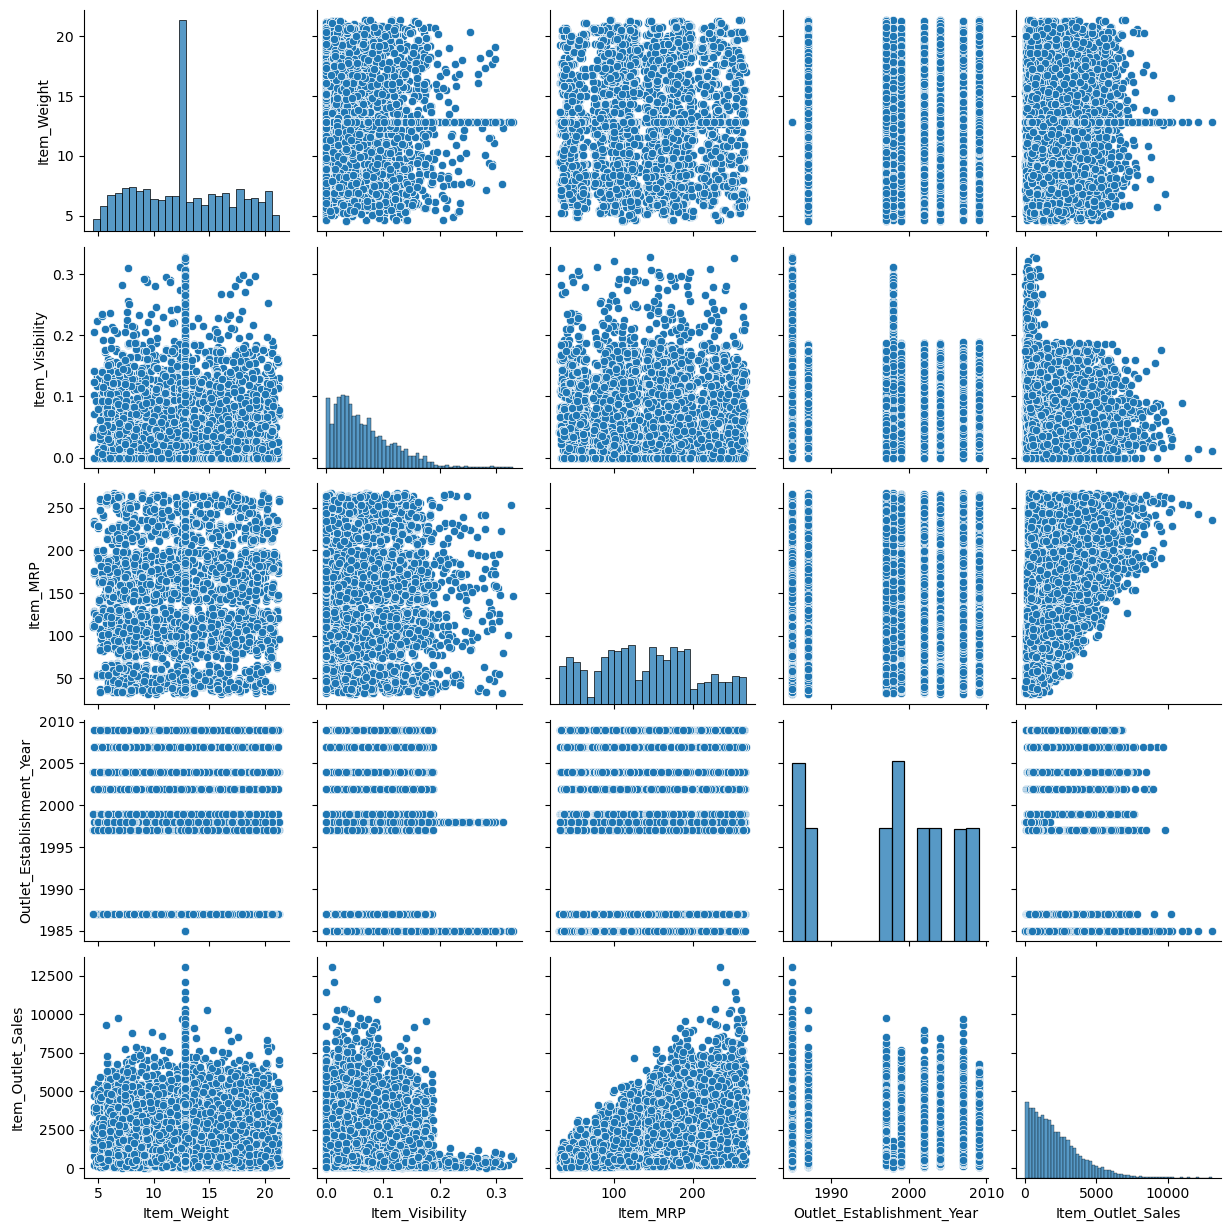

In [34]:
sns.pairplot(train)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


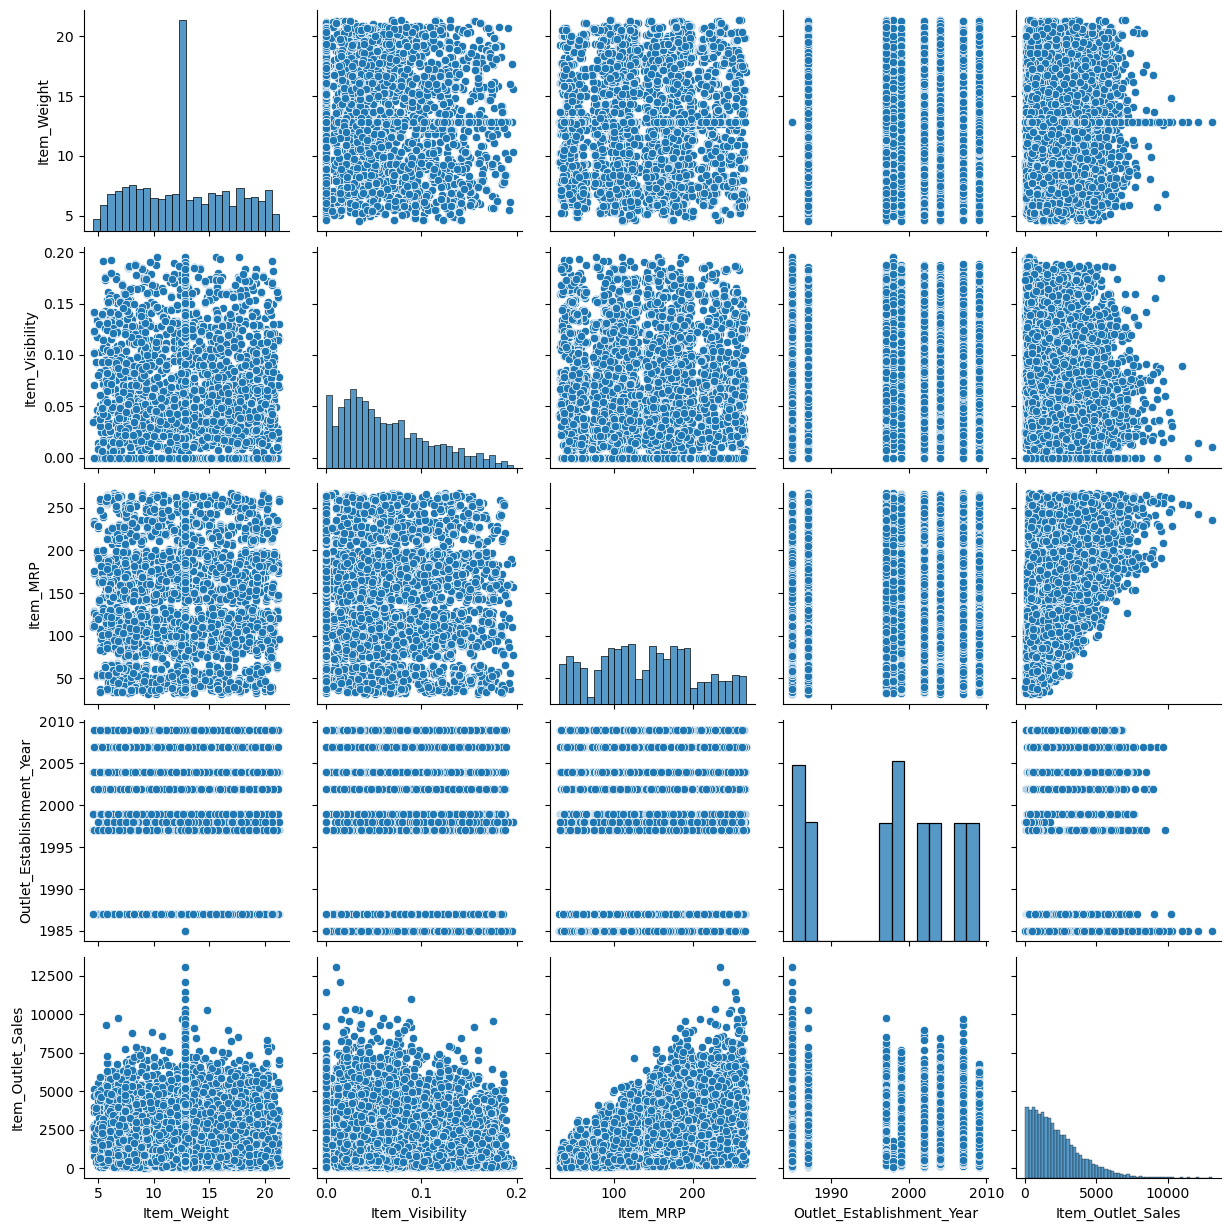

In [35]:
sns.pairplot(data=train_without_Visibility_outliers)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


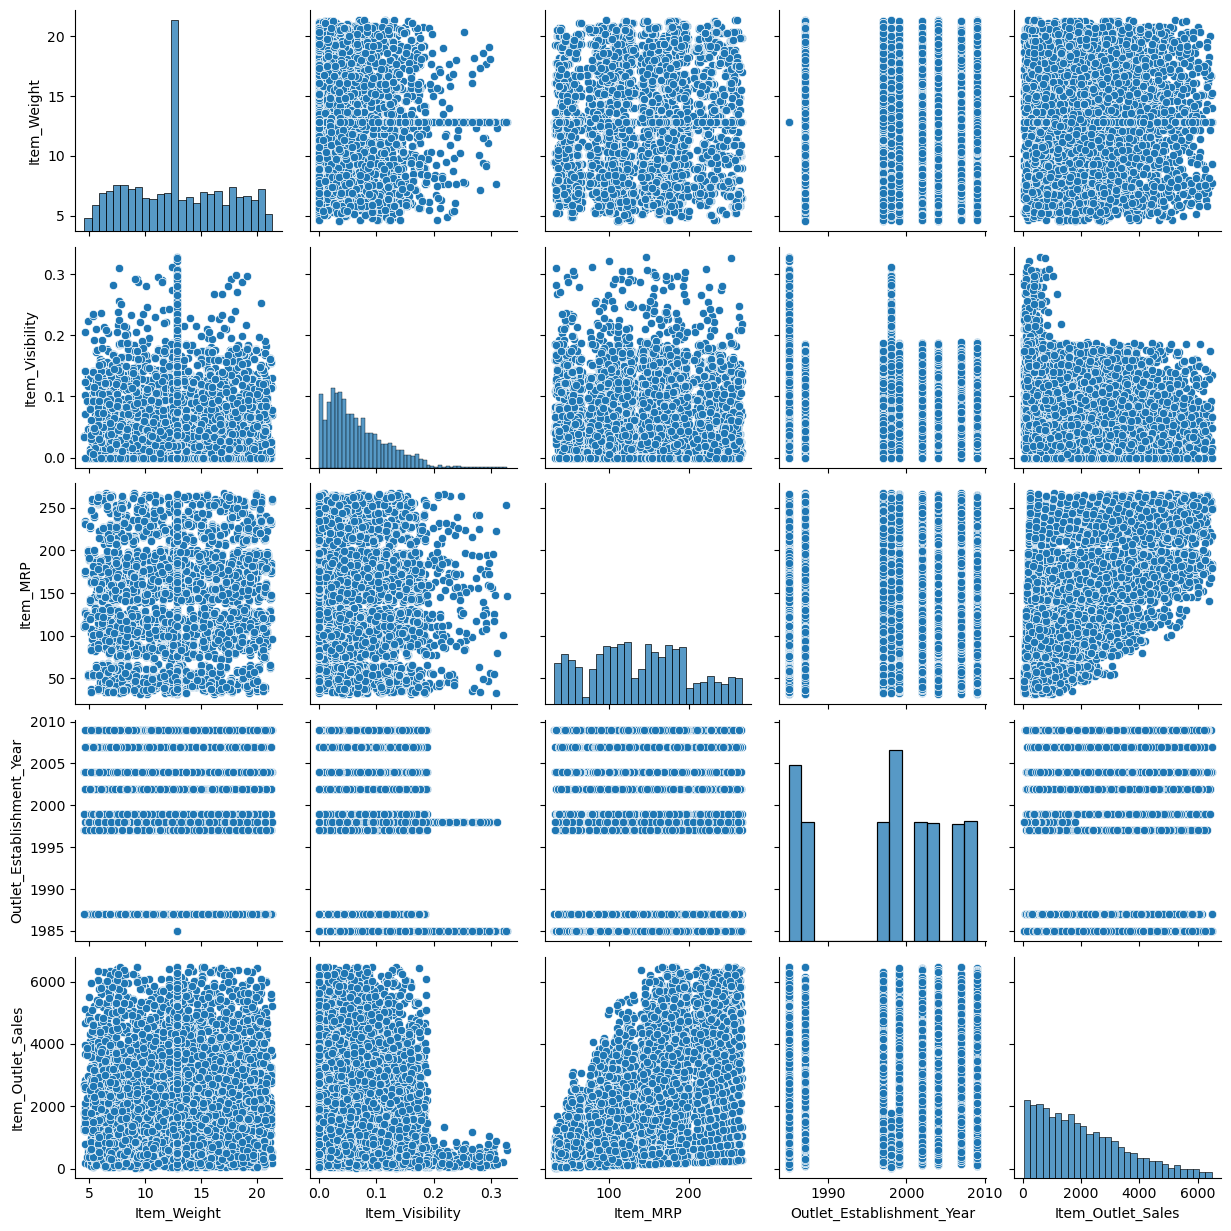

In [36]:
sns.pairplot(data=train_without_Outlet_Sales_outliers)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


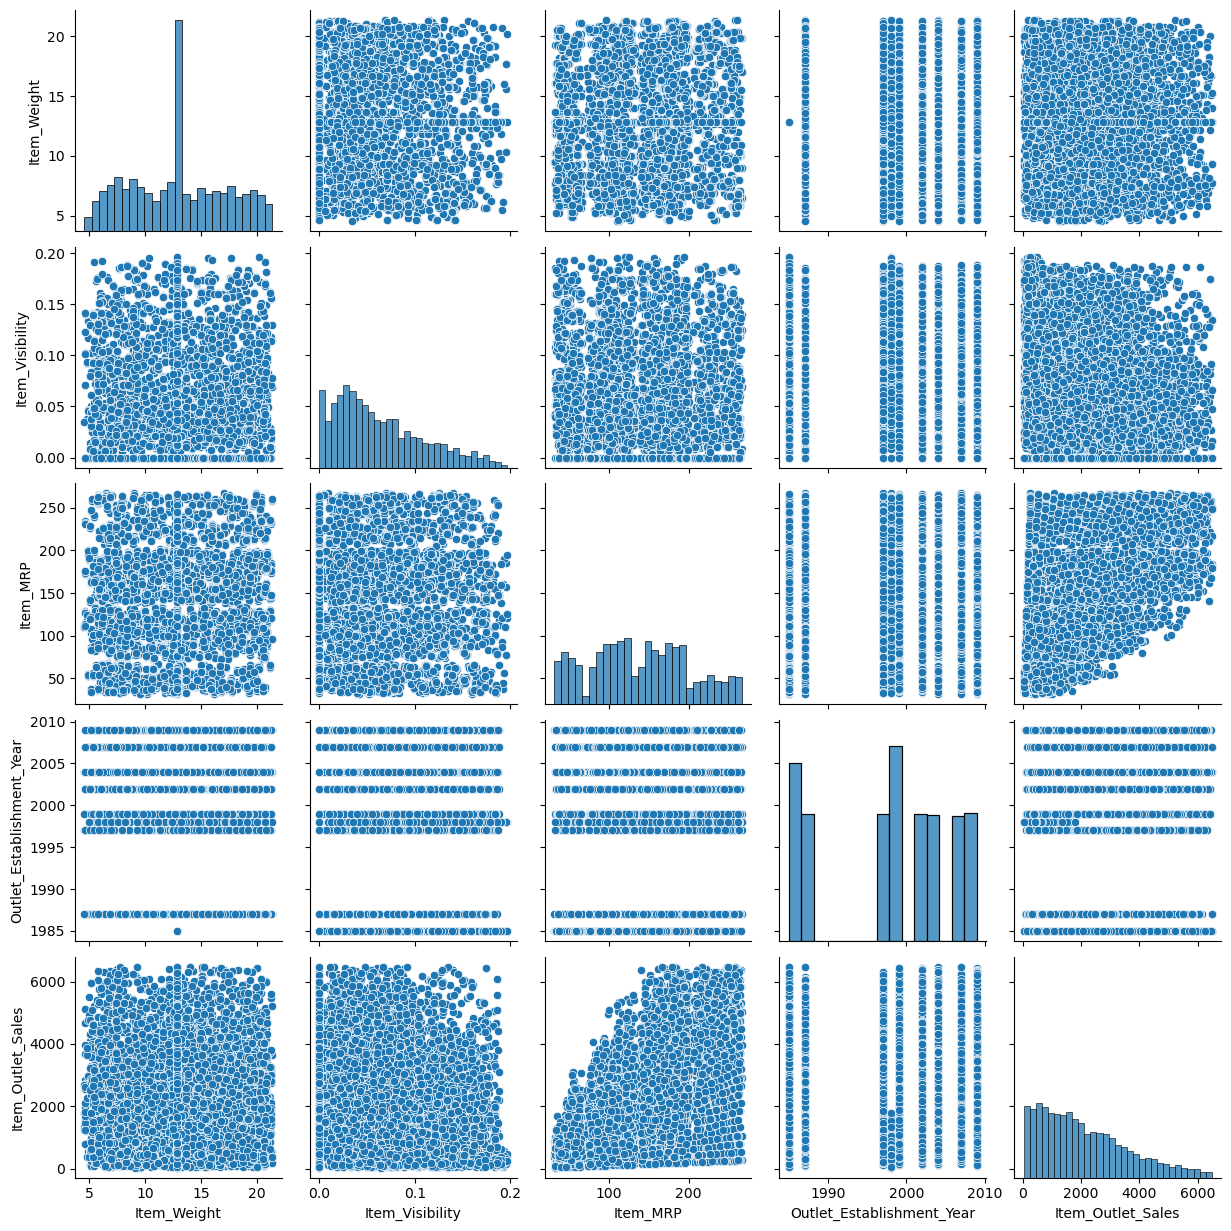

In [37]:
sns.pairplot(data=train_without_outliers)

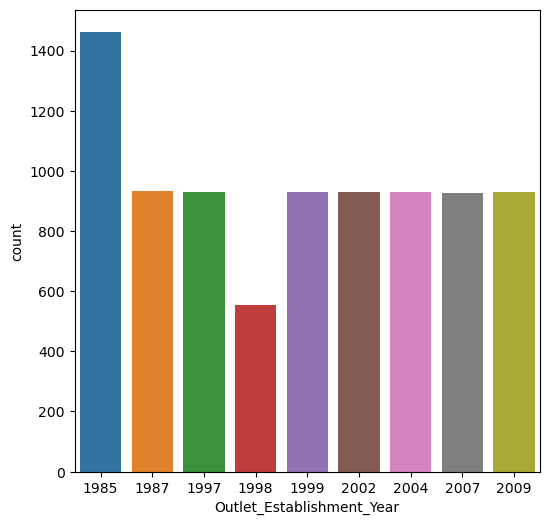

In [38]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

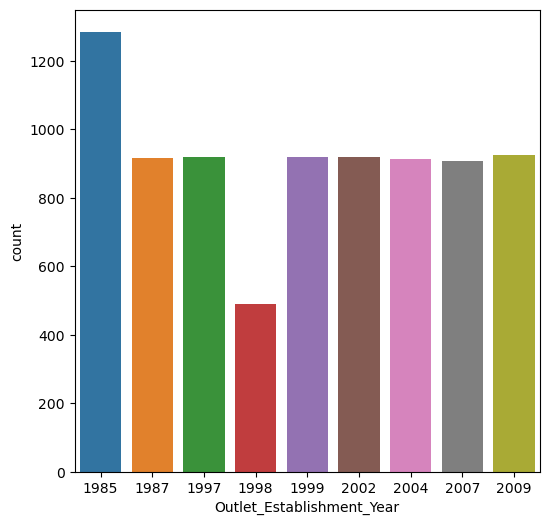

In [39]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_without_outliers)
plt.show()

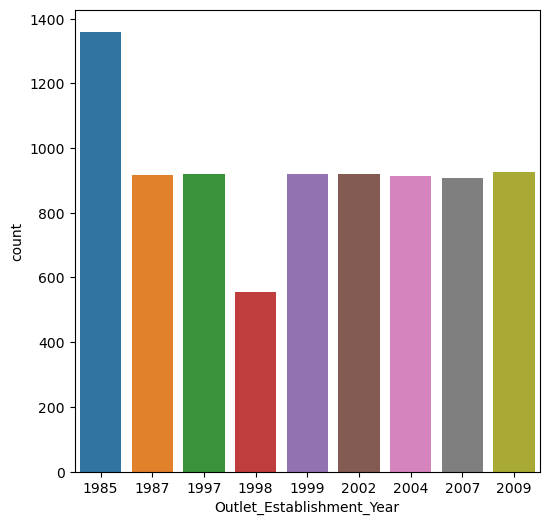

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_without_Outlet_Sales_outliers)
plt.show()

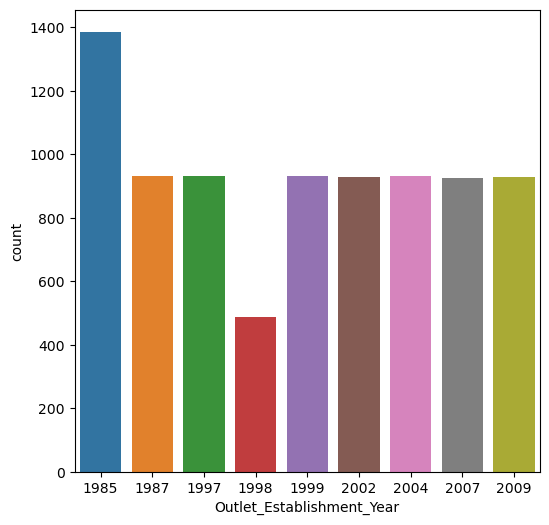

In [41]:

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_without_Visibility_outliers)
plt.show()